In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset = pd.read_csv('./kyphosis.csv');

In [6]:
from sklearn.preprocessing import LabelEncoder
labelenconder = LabelEncoder()
dataset['Kyphosis'] = labelenconder.fit_transform(dataset['Kyphosis'])
dataset

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [20]:
dataset['Age'] = dataset['Age'] // 12
dataset

,Kyphosis,Age,Number,Start
0,0,5,3,5
1,0,13,3,14
2,1,10,4,5
3,0,0,5,1
4,0,0,4,15
...,...,...,...,...
76,1,13,3,13
77,0,2,7,13
78,0,10,2,13
79,1,3,7,6


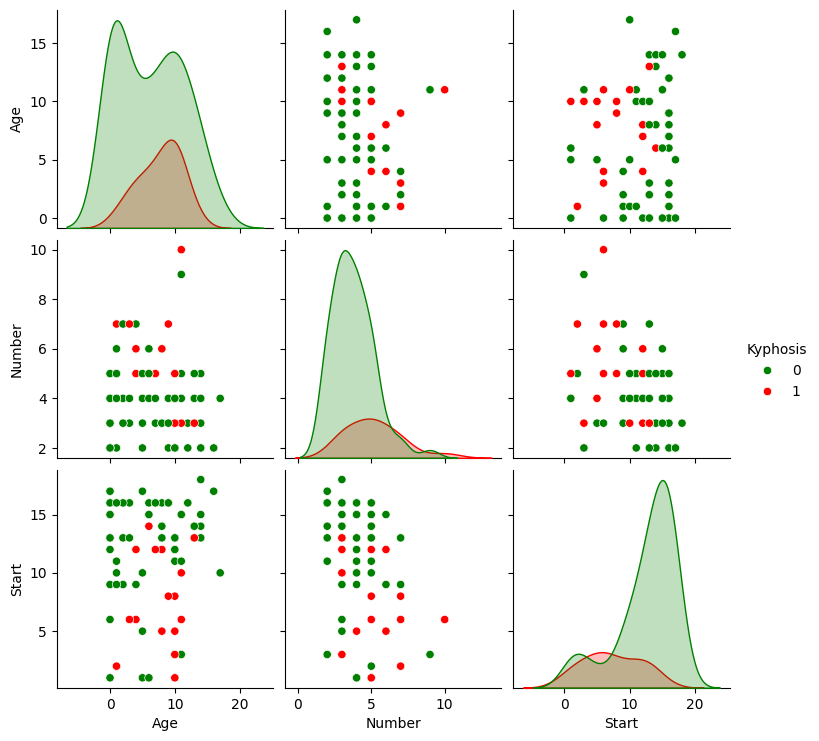

In [21]:
sb.pairplot(dataset, hue="Kyphosis", palette={0: "green", 1: "red"})
plt.show()

In [25]:
X = dataset.drop(['Kyphosis'],axis = 1);
Y = dataset['Kyphosis']
print(f"X features: {X} Y labels: {Y}")

X features:     Age  Number  Start
0     5       3      5
1    13       3     14
2    10       4      5
3     0       5      1
4     0       4     15
..  ...     ...    ...
76   13       3     13
77    2       7     13
78   10       2     13
79    3       7      6
80    3       4     13

[81 rows x 3 columns] Y labels: 0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32


In [85]:
from sklearn.model_selection import train_test_split
x_train,x_temp,y_train,y_temp = train_test_split(X,Y,test_size=0.2,random_state=10)
x_dev,x_test,y_dev,y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=12)
print(f"Size of Training set {x_train.shape}\nSize of Cross Validation set {x_dev.shape}\nSize of test Set{x_test.shape}") 

Size of Training set (64, 3)
Size of Cross Validation set (8, 3)
Size of test Set(9, 3)


In [94]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train);

In [95]:
dev_check = model.predict(x_dev);
test_check = model.predict(x_test);

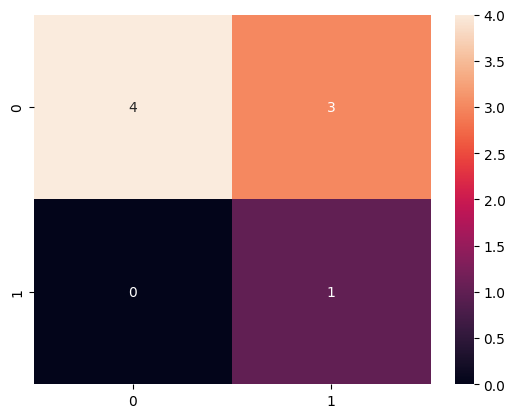

In [96]:
from sklearn.metrics import confusion_matrix,classification_report
matrix1 = confusion_matrix(dev_check,y_dev)
matrix2 = confusion_matrix(test_check,y_test)
sb.heatmap(matrix1 ,annot=True);

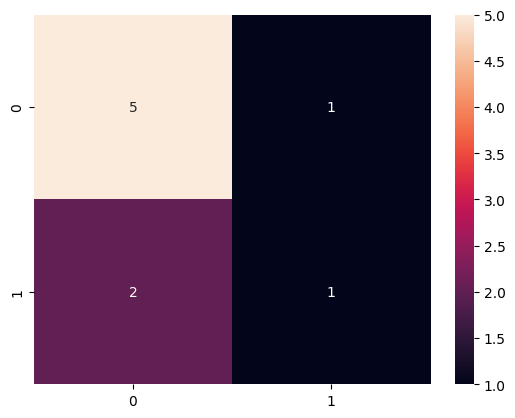

In [97]:
sb.heatmap(matrix2 ,annot=True);

In [98]:
print(classification_report(y_dev,dev_check))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.25      0.40         4

    accuracy                           0.62         8
   macro avg       0.79      0.62      0.56         8
weighted avg       0.79      0.62      0.56         8



THE MODEL IS GOOD AT RECONGNIZING PRESENCE OF KYPHOSIS BUT NOT GOOD AT RCONGNIZING ABSENCE OF KYPHOSIS AT DEV SET

In [91]:
print(classification_report(y_test,test_check))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.33      0.50      0.40         2

    accuracy                           0.67         9
   macro avg       0.58      0.61      0.58         9
weighted avg       0.72      0.67      0.69         9



THE MODEL IS GOOD AT RECONGNIZING ABSCENCE OF KYPHOSIS BUT NOT GOOD AT RCONGNIZING PRESENCE OF KYPHOSIS ON TEST SET

# LETS DO IT WITH DECISION TREE

In [99]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier();
model.fit(x_train,y_train);

In [100]:
dev_check = model.predict(x_dev)
test_check = model.predict(x_test)

In [101]:
matrix1 = confusion_matrix(y_dev,dev_check);
matrix2 = confusion_matrix(y_test,test_check);


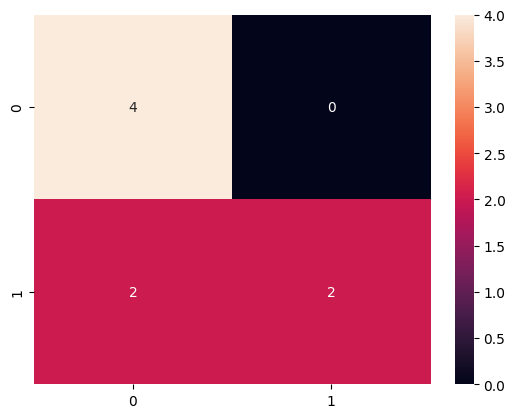

In [102]:
sb.heatmap(matrix1,annot=True);

<Axes: >

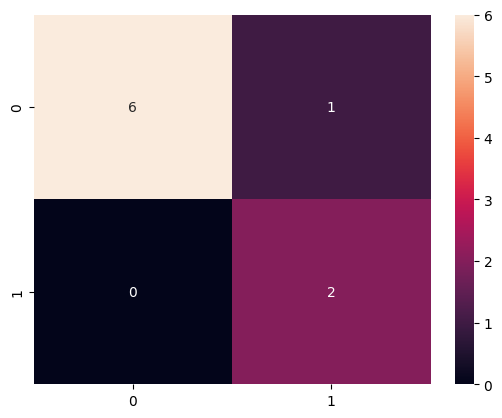

In [103]:
sb.heatmap(matrix2,annot=True)

Feature Importance while training

In [104]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

        importance
Start     0.542857
Number    0.298147
Age       0.158996


In [107]:
print("DEV SET REPORT\n"+ classification_report(y_dev,dev_check))
print("TEST SET REPORT\n" + classification_report(y_test,test_check))

DEV SET REPORT
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.50      0.67         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8

TEST SET REPORT
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.67      1.00      0.80         2

    accuracy                           0.89         9
   macro avg       0.83      0.93      0.86         9
weighted avg       0.93      0.89      0.90         9



In [114]:
print(x_train.shape)

(64, 3)


In [108]:
import tensorflow as tf;
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [136]:
model = Sequential([
     tf.keras.Input(shape=(3,)),  
     Dense(25,activation = 'sigmoid'),
        Dense(15,activation = 'sigmoid'),
        Dense(1,activation = 'sigmoid')
])

In [137]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 25)                100       
                                                                 
 dense_43 (Dense)            (None, 15)                390       
                                                                 
 dense_44 (Dense)            (None, 1)                 16        
                                                                 
Total params: 506 (1.98 KB)
Trainable params: 506 (1.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [164]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    x_train,y_train,
    epochs=20
)

Epoch 1/20
2/2 [==============================] - 1s 5ms/step - loss: 0.3209
Epoch 2/20
2/2 [==============================] - 0s 7ms/step - loss: 0.3203
Epoch 3/20
2/2 [==============================] - 0s 4ms/step - loss: 0.3203
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.3202
Epoch 5/20
2/2 [==============================] - 0s 7ms/step - loss: 0.3195
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 0.3196
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 0.3196
Epoch 8/20
2/2 [==============================] - 0s 7ms/step - loss: 0.3192
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 0.3195
Epoch 10/20
2/2 [==============================] - 0s 4ms/step - loss: 0.3192
Epoch 11/20
2/2 [==============================] - 0s 5ms/step - loss: 0.3191
Epoch 12/20
2/2 [==============================] - 0s 4ms/step - loss: 0.3191
Epoch 13/20
2/2 [==============================] - 0s 8ms/step - loss: 0.

In [179]:
train_prediction = model.predict(x_train)
dev_check = model.predict(x_dev)
test_check = model.predict(x_test)
train_predictions = np.round(train_prediction).flatten()
dev_predictions = np.round(dev_check).flatten()
test_predictions = np.round(test_check).flatten()

1/1 [==============================] - 0s 32ms/step


In [181]:
matrix1 = confusion_matrix(y_train, train_predictions)
matrix2 = confusion_matrix(y_dev, dev_predictions)
matrix3 = confusion_matrix(y_test, test_predictions)

<Axes: >

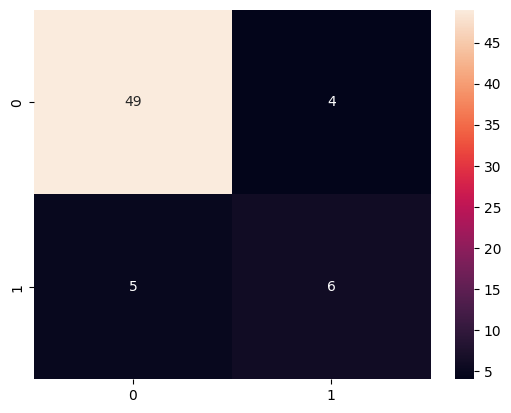

In [182]:
sb.heatmap(matrix1,annot=True)

<Axes: >

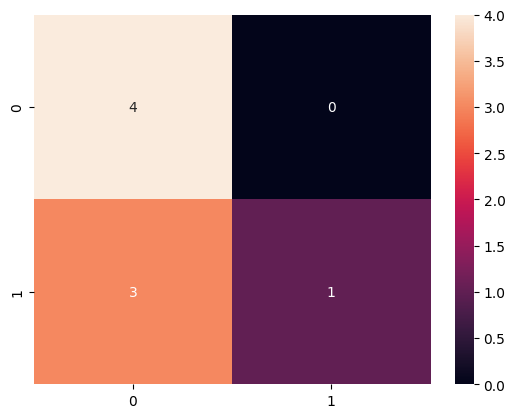

In [183]:
sb.heatmap(matrix2,annot=True)

<Axes: >

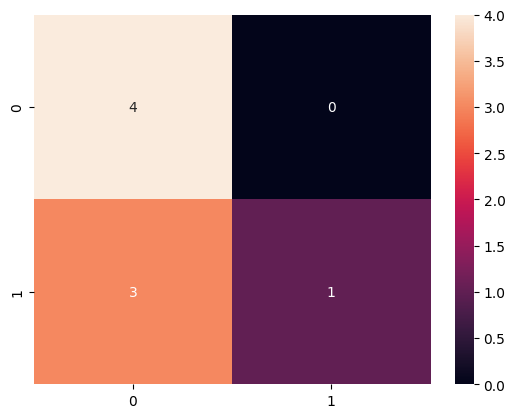

In [184]:
sb.heatmap(matrix2,annot=True)